In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#load csv dataset
# make sure to change the path when testing
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MP2_Data.csv')
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


# Step1- Data Processing

In [ ]:
#remove unnecessary column from the dataset

df = pd.DataFrame(data)
newdf = df.drop("ID", axis='columns')
newdf

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,28,0,22,0,1,0,0,0,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,3,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,6,0,0,0,0


In [ ]:
#check missing values
newdf.isnull().any()

Week2_Quiz1    False
Week3_MP1      False
Week3_PR1      False
Week5_MP2      False
Week5_PR2      False
Week7_MP3      False
Week7_PR3      False
Week4_Quiz2    False
Week6_Quiz3    False
Week8_Total    False
Week1_Stat0    False
Week1_Stat1    False
Week1_Stat2    False
Week1_Stat3    False
Week2_Stat0    False
Week2_Stat1    False
Week2_Stat2    False
Week2_Stat3    False
Week3_Stat0    False
Week3_Stat1    False
Week3_Stat2    False
Week3_Stat3    False
Week4_Stat0    False
Week4_Stat1    False
Week4_Stat2    False
Week4_Stat3    False
Week5_Stat0    False
Week5_Stat1    False
Week5_Stat2    False
Week5_Stat3    False
Week6_Stat0    False
Week6_Stat1    False
Week6_Stat2    False
Week6_Stat3    False
Week7_Stat0    False
Week7_Stat1    False
Week7_Stat2    False
Week7_Stat3    False
Week8_Stat0    False
Week8_Stat1    False
Week8_Stat2    False
Week8_Stat3    False
Week9_Stat0    False
Week9_Stat1    False
Week9_Stat2    False
Week9_Stat3    False
Grade          False
dtype: bool

In [ ]:
# It is noticable that there are coulmns with same value, identifying them
newdf.apply(lambda x: x.nunique())

Week2_Quiz1     7
Week3_MP1       9
Week3_PR1       2
Week5_MP2      25
Week5_PR2       5
Week7_MP3      35
Week7_PR3       3
Week4_Quiz2    23
Week6_Quiz3     7
Week8_Total    70
Week1_Stat0    25
Week1_Stat1     1
Week1_Stat2     6
Week1_Stat3     4
Week2_Stat0    37
Week2_Stat1    25
Week2_Stat2     8
Week2_Stat3    12
Week3_Stat0    59
Week3_Stat1     8
Week3_Stat2     9
Week3_Stat3     9
Week4_Stat0    61
Week4_Stat1    37
Week4_Stat2    11
Week4_Stat3     8
Week5_Stat0    48
Week5_Stat1    20
Week5_Stat2    12
Week5_Stat3     8
Week6_Stat0    49
Week6_Stat1    32
Week6_Stat2    13
Week6_Stat3     7
Week7_Stat0    42
Week7_Stat1    18
Week7_Stat2    11
Week7_Stat3    10
Week8_Stat0    32
Week8_Stat1    16
Week8_Stat2     9
Week8_Stat3     6
Week9_Stat0    26
Week9_Stat1    11
Week9_Stat2    11
Week9_Stat3     2
Grade           5
dtype: int64

In [ ]:
#Week1_Stat1 has 1 value, drop the column
grades=newdf.drop("Week1_Stat1", axis='columns')
grades


,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,28,0,22,0,1,0,0,0,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,3,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,6,0,0,0,0


The Week8_Total is not select as a feature, since it will used for the grade prediction directly, if the model is trainned with the Week8_Total, it will only use that for the grade prediction. So that feature is removed form the data frame  

In [ ]:
new_grades=grades.drop("Week8_Total", axis='columns')
new_grades

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,0,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,8,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,4,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,12,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,6,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,8,...,0,28,0,22,0,1,0,0,0,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,12,...,0,0,0,0,0,3,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,...,0,0,0,0,0,6,0,0,0,0


# Step 2 – Data split: Training and Test sets

In [ ]:
#features
df_f = new_grades.drop('Grade', axis=1)
#Prediction
df_p = new_grades['Grade']


In [ ]:
# Splitting a dataset into two sets for training and testing
train_f, test_f, train_p, test_p = train_test_split(df_f, df_p, random_state=42, test_size=0.25)

In [ ]:
print("Train Dataset: " + str(train_f.shape))
print("Test Dataset: " + str(test_f.shape))

Train Dataset: (80, 44)
Test Dataset: (27, 44)


# Step 3 – Model Training



#1.   KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score


X = new_grades.drop('Grade', axis=1)
y = new_grades['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # can adjust the number of neighbors (k) as needed.

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", str(round(accuracy,3)))

# Print a classification report
print(classification_report(y_test, y_pred))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the F1-score
print("F1-Score:", str(round(f1, 3)))


Accuracy: 0.519
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           2       0.00      0.00      0.00         3
           3       0.18      0.67      0.29         3
           4       0.75      0.43      0.55         7
           5       0.00      0.00      0.00         4

    accuracy                           0.52        27
   macro avg       0.34      0.40      0.33        27
weighted avg       0.49      0.52      0.48        27

Confusion Matrix:
[[9 0 1 0 0]
 [2 0 1 0 0]
 [0 0 2 1 0]
 [0 0 4 3 0]
 [1 0 3 0 0]]
F1-Score: 0.476


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#2.   Random Forest




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

X = new_grades.drop('Grade', axis=1)
y = new_grades['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",  str(round(accuracy,3)))

# Print a classification report
print(classification_report(y_test, y_pred))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the F1-score
print("F1-Score:", str(round(f1, 3)))

Accuracy: 0.63
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         3
           3       0.25      0.67      0.36         3
           4       0.62      0.71      0.67         7
           5       0.00      0.00      0.00         4

    accuracy                           0.63        27
   macro avg       0.38      0.48      0.41        27
weighted avg       0.56      0.63      0.58        27

Confusion Matrix:
[[10  0  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  2  1  0]
 [ 0  0  1  5  1]
 [ 0  0  3  1  0]]
F1-Score: 0.584


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3.   Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

X = new_grades.drop('Grade', axis=1)
y = new_grades['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier() # Adjust the max_depth value as needed DecisionTreeClassifier(max_depth=10)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", str(round(accuracy,3)))

# Display a classification report
print(classification_report(y_test, y_pred))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the F1-score
print("F1-Score:", str(round(f1, 3)))



Accuracy: 0.704
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           2       0.00      0.00      0.00         3
           3       0.33      1.00      0.50         3
           4       1.00      0.57      0.73         7
           5       0.75      0.75      0.75         4

    accuracy                           0.70        27
   macro avg       0.62      0.64      0.58        27
weighted avg       0.78      0.70      0.71        27

Confusion Matrix:
[[9 1 0 0 0]
 [0 0 3 0 0]
 [0 0 3 0 0]
 [0 0 2 4 1]
 [0 0 1 0 3]]
F1-Score: 0.706


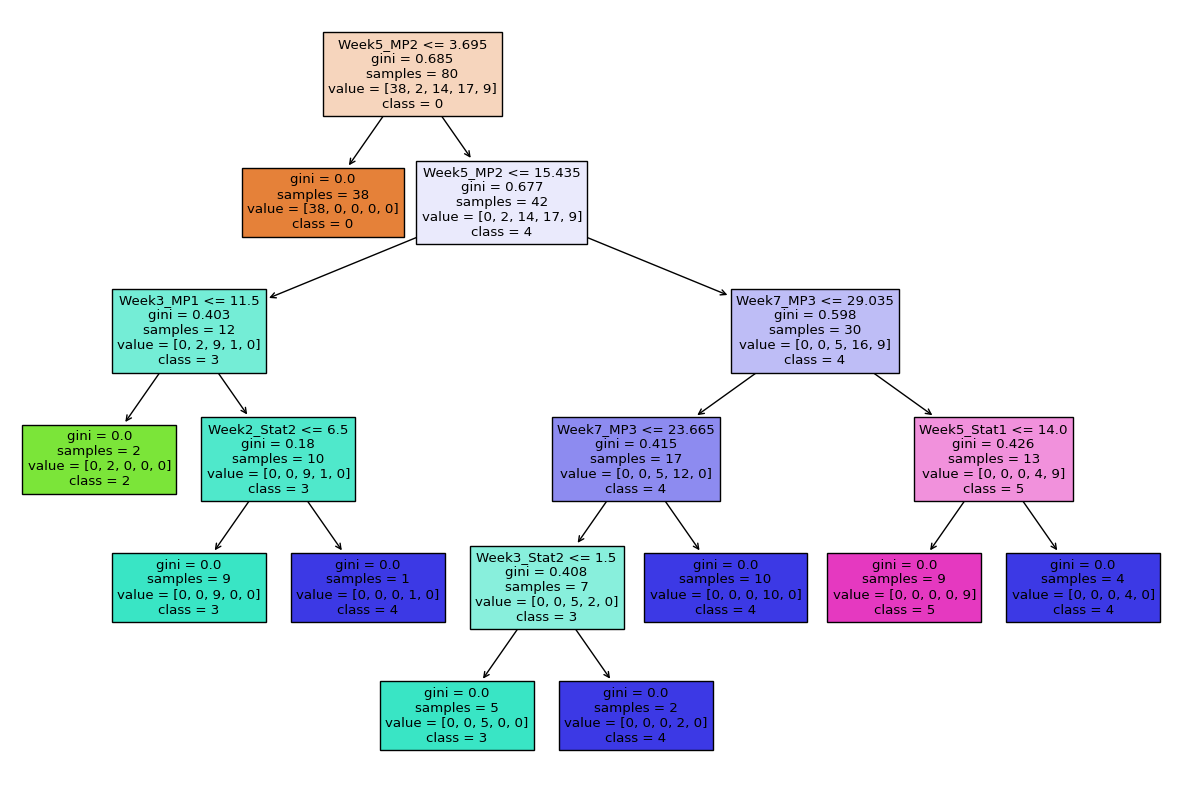

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=list(map(str, dt_classifier.classes_)))
plt.show()


# Step 4 –  Performance Evaluation  

Experiment with different hyperparameters for KNN, Random Forest, and Decision Tree. For KNN, can try different values of 'k' (number of neighbors).

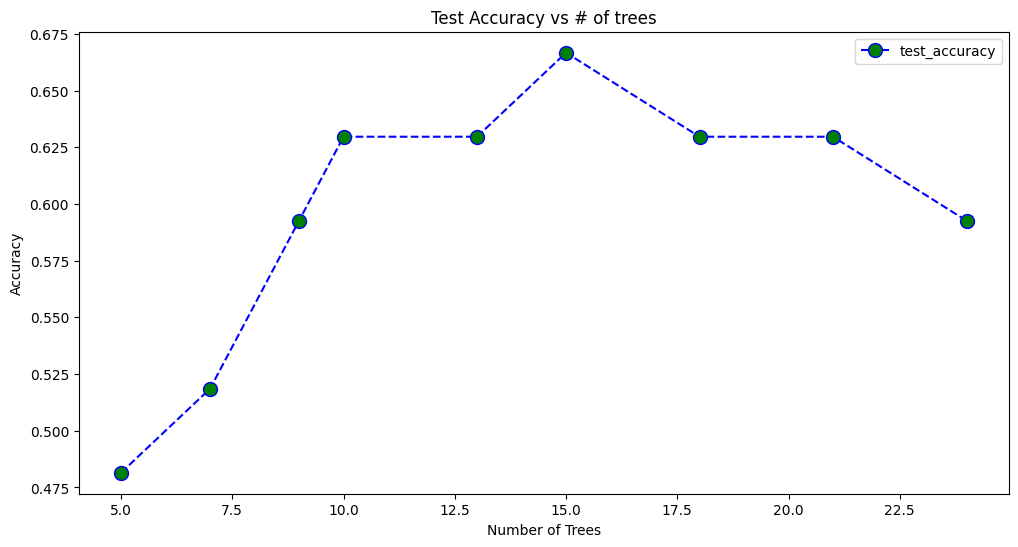

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create an empty list to store test accuracy values
accuracy_list_test = []

# Define a list of different numbers of trees (n_estimators)
n_estimators = [5, 7, 9, 10, 13, 15, 18, 21, 24]

# Loop through the list of n_estimators
for n in n_estimators:
    # Create a Random Forest classifier with the current number of trees
    new_model = RandomForestClassifier(n_estimators=n, n_jobs=2, random_state=0)

    # Fit the model on the training data
    new_model.fit(X_train, y_train)

    # Use the trained model to make predictions on the test set
    predicted_values_test = new_model.predict(X_test)

    # Calculate the test accuracy and store it in the accuracy_list_test
    test_accuracy = accuracy_score(y_test, predicted_values_test)
    accuracy_list_test.append(test_accuracy)

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot the test accuracy values against the number of trees
plt.plot(n_estimators, accuracy_list_test, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10, label="test_accuracy")

# Set the plot title and labels
plt.title('Test Accuracy vs # of trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(loc="upper right")

# Show the plot
plt.show()



The Random Forest ensemble model is a versatile tool that can consist of any number of decision trees. However, finding the ideal number of trees is essential for optimizing model performance. After iteratively experimenting with various tree quantities, it was determined that 15 trees provided the best results, striking a balance between capturing intricate patterns and preventing overfitting. Using fewer than 10 trees could lead to a decrease in accuracy, while using an excessive number of trees might result in unnecessary computational complexity without substantial performance gains.





#Step 5 – Important features  

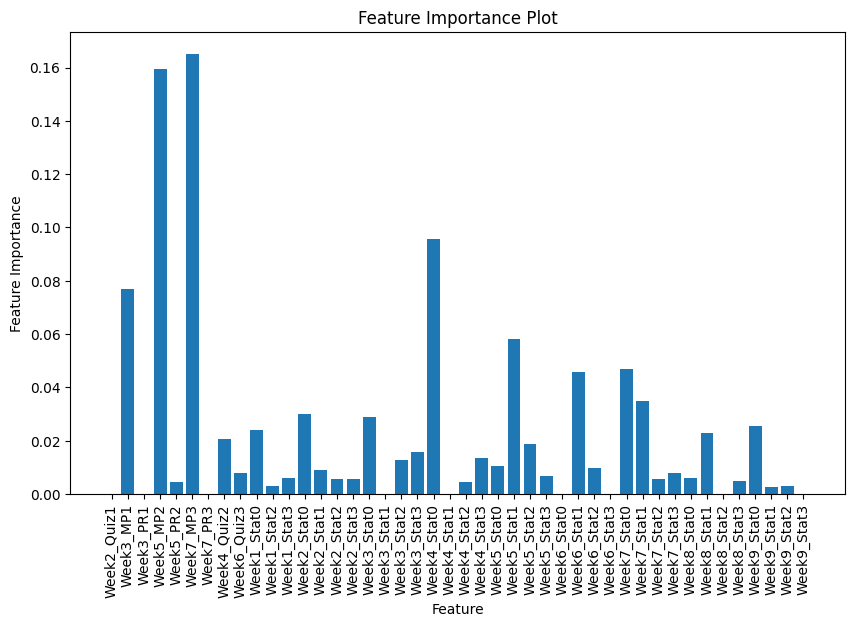

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
